# Analizando datos
Trabajaremos con un conjunto de evaluación de películas por usuarios de internet, del sitio [MovieLens](https://grouplens.org/datasets/movielens/). El sitio contiene varias versiones de estos datos. Existen versiones de 20 millones, 100 mil, 27 millones de notas (ratings) para películas. Usaremos un archivo que contiene 100 mil.

1- Leer el archivo ``ratings`` y asignar a la variable notas, luego visualizar los primeros registros ``notas.head()``

In [1]:
import pandas as pd

notas = pd.read_csv("data/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


2- Visualizar la dimensión del DataFrame notas

In [0]:
notas.shape

(100836, 4)

3- Visualizar los nombres de las columnas

In [2]:
notas.columns = ["usuarioId", "peliculaId", "nota", "momento"]
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


4- Visualizar los valores colocados en la columna nota de manera única

In [0]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

5- Mostrar cuántas veces una nota específica aparece en la columna nota

In [0]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

6- Mostrar la media y la mediana de los valores de la columna nota

In [0]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [0]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

## Explorar los datos de forma visual
Para realizar una impresión visual de un conjunto de datos usamos una función de Pandas que se llama ``plot()``. Podemos plotar una serie de datos con ``notas.nota.plot()`` 

La declaración ``notas.nota`` es una manera sintáctica de expresar los datos de la columna ``nota``

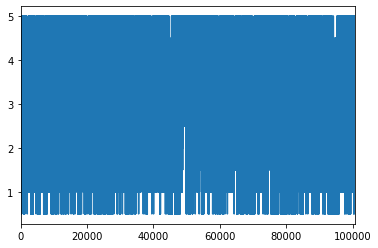

In [15]:
notas.nota.plot()

Este gráfico no tiene sentido. Las notas se visualizan en el eje Y pero que son los valores en el eje X? de 0 a 100.000. Por padrón, el gráfico plot() de una seria cruza los índices de la tabla con los valores de la conlumna apuntando (en el caso, nota), creando puntos para cada resultado. Todos los puntos están conectados por rectas, generando el gráfico ilegible.

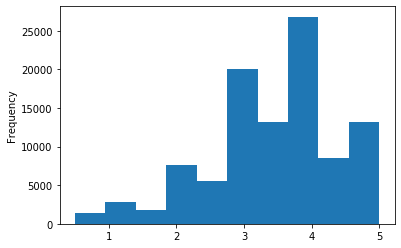

In [17]:
# usando el tipo de gráfico
notas.nota.plot(kind='hist')

Analizando el histograma, percibimos que la nota 5 aparece diversas veces; la nota 4,5 no tanto; la nota 4 es la que más veces aparece.

In [18]:
# información de medidas estadísticas del conjunto de datos
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Visualización usando [Seaborn](https://seaborn.pydata.org/) 
Importar la librería ``Seaborn`` y llamar a la función ``sns.boxplot()`` pasando como parámetro la serie ``notas.nota``

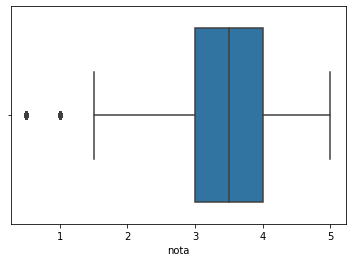

In [11]:
import seaborn as sns

sns.boxplot(notas.nota)

En este gráfico, la mediana está representada en el medio del rectángulo azul, o sea, entre 3 y 5, dividiendo en dos partes, 50% de los datos (entre 3 y 3,5 y entre 3,5 y 4). Los otros 25% de los datos están entre 4 y 5, y el restante está debajo de 3.

**Qué información podemos extraer**

- La mitad de los usuarios dió una evaluación entre 3 y 4
- Las notas entre 0,5 y 1,5 figuran significativamente poco en esta muestra


# Mirando las películas
Estamos analizando y explorando los datos por medio de medidas descriptivas y visualizaciones. En estas sección analizaremos algunas películas desde el conjunto de datos. Para eso leeremos el archivo movies.csv y lo asignamos a la variable peliculas, luego exibimos las 5 primeras películas, ``head()``.

In [2]:
peliculas = pd.read_csv("data/movies.csv")
peliculas.columns = ["peliculaId", "titulo", "generos"]
peliculas.head()

,peliculaId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analizando algunas notas específicas por película

Para sacar información sobre una película y su nota (desde el DataFrame notas) podemos usar el método ``query`` (una pregunta), comparando el valor del identificador de la película. Por ejemplo: para la película "Toy Story (1995)", ``peliculaId = 1``.

In [4]:
# calcular el promedio de la pelicula "Toy Story"
notas.query("peliculaId==1").nota.mean()

3.9209302325581397

In [38]:
notas.query("peliculaId==2").nota.mean()

3.4318181818181817

In [22]:
# repetir el proceso de exhibir las notas y sacar el promedio para otras películas de la lista,
# usamos groupby para agrupar las notas por identificador de película
# El retorno será un objeto del tipo ``DataFrameGroupBy`` que nos permite usar algunas métricas
medias_por_pelicula = notas.groupby("peliculaId").mean().nota
medias_por_pelicula.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

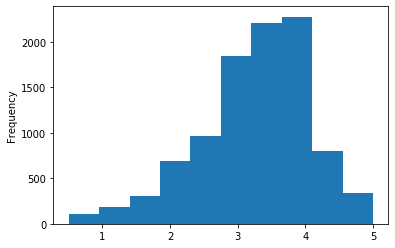

In [21]:
# Plotar los datos en un gráfico, buscando analizar como esos promedios están distribuidos.
# Esto es realizado con un histograma de Pandas
medias_por_pelicula.plot(kind='hist')

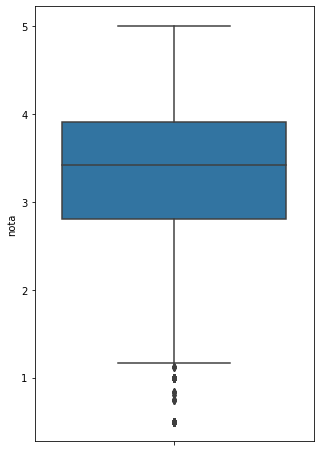

In [12]:
# Seaborn nos permite colocar descripciones al gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_pelicula)

In [8]:
medias_por_pelicula.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

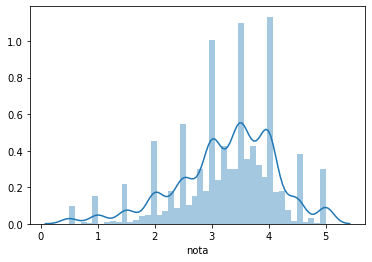

In [23]:
# Utilizando Seaborn, utiliza una cantidad de "bins" pre-determinado.
sns.distplot(medias_por_pelicula)

Text(0.5, 1.0, 'Histograma de los promedios de las películas')

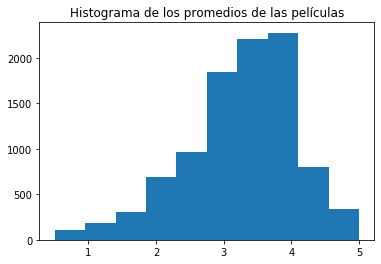

In [10]:
plt.hist(medias_por_pelicula)
plt.title("Histograma de los promedios de las películas")

## Leer otros archivos
 [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata/), un dataset hospedado en Kaggle. Este conjunto de datos contiene más películas que MovieLens.
 
 Leer el archivo y asignarle a una variable tmdb, luego listar los primero 5 elementos

In [3]:
tmdb = pd.read_csv("data/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Se puede visualizar que las diferentes columnas del DataFrame contiene tipos de valores diferentes. Podemos clasificar esos tipos de variables, existen diversas formas de realizar esa clasificación. El conocimiento de estadística ayuda en esa clasificación.

In [26]:
# Los valores de la columna "original_language" son valores categóricos o 
# variable categórica nominal
tmdb.original_language.unique() 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
# Ejemplo de variables categóricas
# primer grado
# segundo grado
# tercer grado
# 1 grado < 2 grado < 3 grado # categorica ordinal

In [28]:
# budget => presupuesto => cuantitativa continua 

In [29]:
# cantidad de votos => 1, 2, 3, 4, no tiene 2.5 votos.
# notas de movielens => 0.5, 1, 1.5, ... ,5 no tiene 2.7